Importing the libraries 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Importing the dataset

In [ ]:
final_file = pd.read_csv("/Users/nvgenomics/Desktop/projects/Lung diagnosis /cancer patient data sets.csv")
final_file.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Checking and in case if there are any null records and removing the duplicate data

In [ ]:
final_file.isnull().sum()
final_file = final_file.drop_duplicates()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Since there is no missing data or duplicate data for the given dataset therefore we can proceed forward

In [ ]:
final_file.drop(columns = ['index','Patient Id'],axis = 1,inplace= True)
final_file

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
final_file['Level'].unique()
labeling = LabelEncoder()
final_file['Level']=labeling.fit_transfrom(final_file['Level'])


array(['Low', 'Medium', 'High'], dtype=object)

Visualing the Dataset

<Figure size 3000x2400 with 0 Axes>

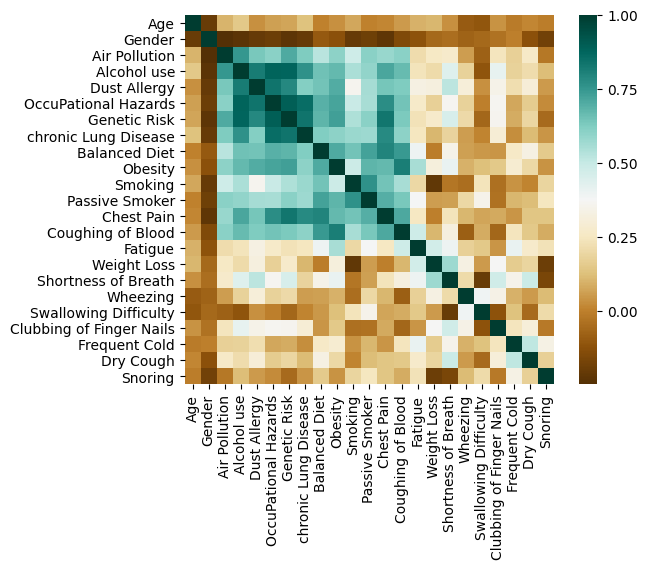

<Figure size 3000x2400 with 0 Axes>

In [ ]:
sns.heatmap(final_file.corr(),square=True,cmap='BrBG')
plt.figure(figsize=(30,24))

In [22]:
corr = pd.DataFrame({
    'Col1': [],
    'Col2': [],
    'Correlation Between two ': [] 
})

In [ ]:
#finding the correlation between the each columns
l_life = []
for col1 in final_file.columns:
    max1 = 0
    column1 = ''
    column2 = ''
    df = []
    for col2 in final_file.columns:
        if col1!=col2:
            corr1 = final_file[col1].corr(final_file[col2])
            if corr1 > max1:
                max1 = corr1
                df = { 
                      'Col1' : col1,
                      'Col2' : col2,
                      'Correlation between two'  :  corr1
                }
    l_life.append(df)
df1 = pd.DataFrame(l_life)
df1 = df1.sort_values(by = ['correlation between two'], ascending = False)
df1


Visualing the data (by plotting the histogram)

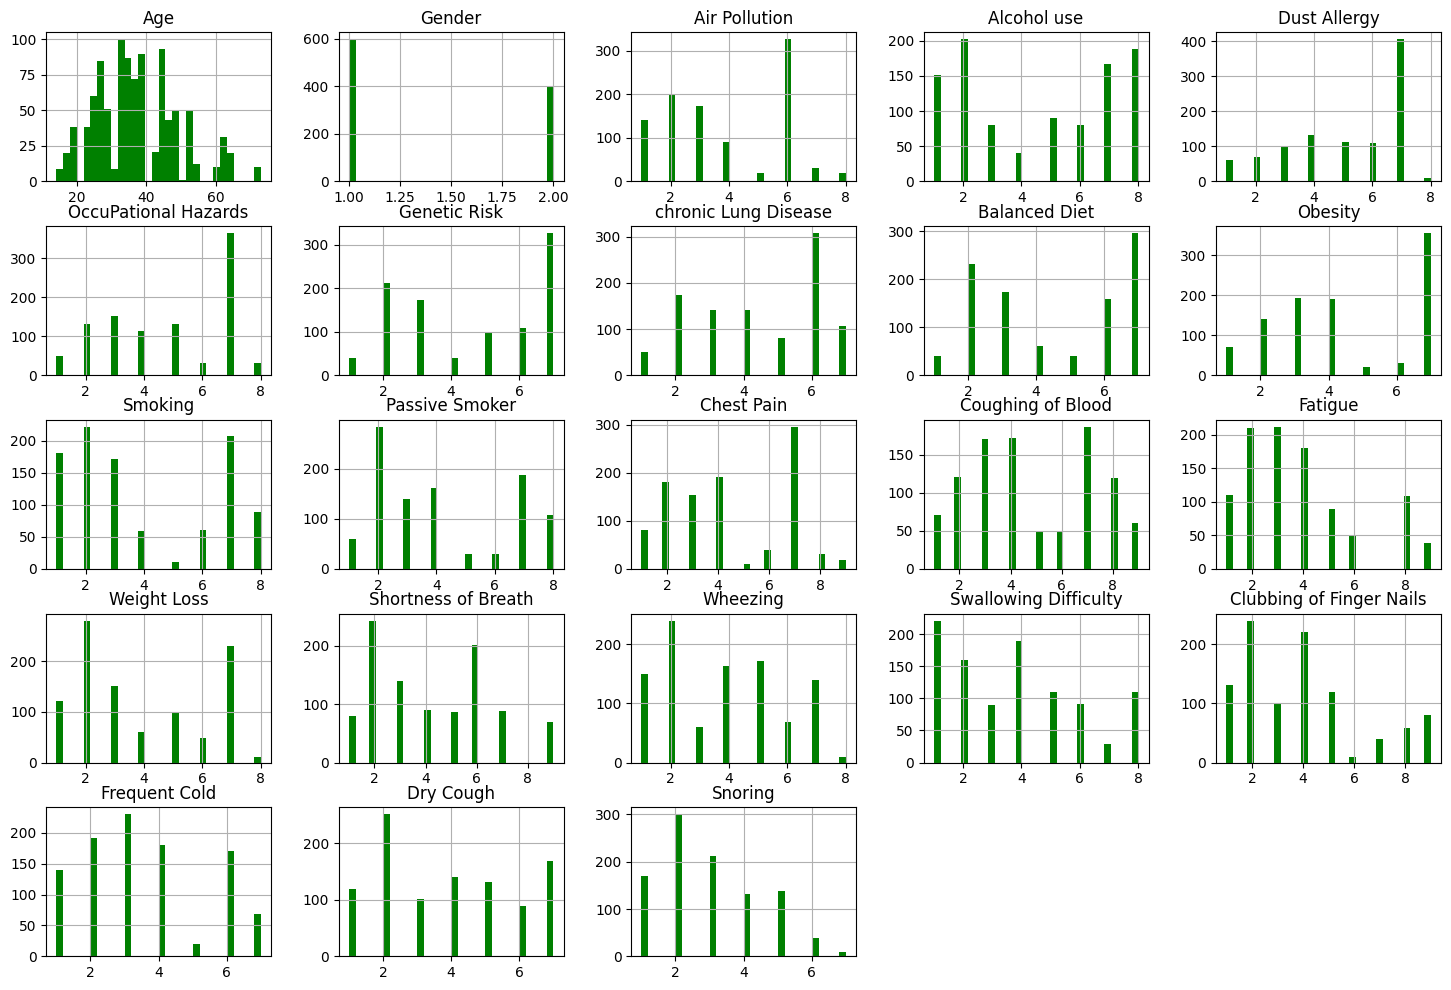

In [ ]:
final_file.hist(bins=30,figsize=(18,12),color='g')
plt.show()

We will split the data into training and test set

In [ ]:
x = final_file.iloc[:,:-1].values
y = final_file.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

Scalling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Now we will Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
classification_report(y_test,y_pred)
